# Hot&Bot cafe 

## Hot&Bot cafe is a concept for a small robot-run cafe in Los Angeles.

### The project is promising but expensive, so here is a study market conditions for the food establishments in LA to help to build a presentention to attract new investor to the project

### Don't forget to check the presentation (link at the end of the notebook)




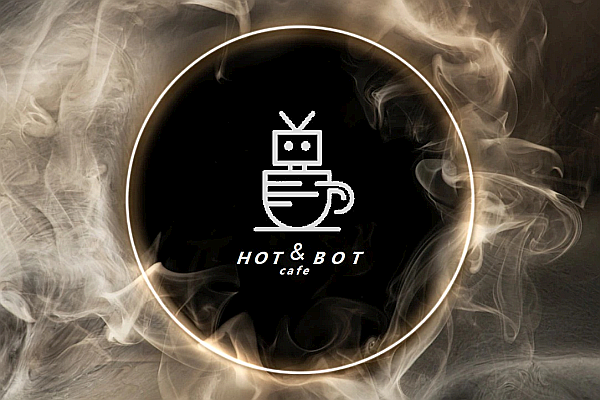

<a id='index'></a>


# Contents Table

### [LA Restaurants Study](#step1)
- #### [ Types of establishments](#step1a)
- #### [Chain and non-chain establishments](#step1b)
- #### [ Which type of establishment is typically a chain?](#step1c)
- #### [What seats distribution characterizes chains?](#step1d)
- #### [Average number of seats for each type of restaurant](#step1e)
- #### [Street names and number of restaurants](#step1f)
- #### [Top ten streets by number of restaurants](#step1g)
- #### [Streets that only have one restaurant](#step1h)
- #### [Number of seats in  streets with a lot of restaurants](#step1i)

### [ Cafe Market study for Hot&Bot](#step2)


### [ Conclusions & Recommendations](#step3)


### [Hot & Bot Cafe Presentation:](#step4)



## Download the data and prepare it for analysis

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import usaddress



In [2]:
try:
    rest = pd.read_csv('rest_data_us.csv')
except:
    rest = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data_us.csv')

In [3]:
rest.head()

id          object_name                    address  chain object_type  \
0  11786  HABITAT COFFEE SHOP     3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY # 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD # 253  False   Fast Food   
3  11789    TRINITI ECHO PARK         1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN         2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20

In [4]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
rest = rest.applymap(lambda x: x.lower() if type(x) == str else x)

In [6]:
#renaming the columns
rest.columns = ('id', 'name', 'address', 'chain', 'type', 'seats')

In [7]:
#checking for duplicates
rest[rest.duplicated()]

Empty DataFrame
Columns: [id, name, address, chain, type, seats]
Index: []

In [8]:
# checking the null values
rest[rest.chain.isnull()]

id                     name               address chain        type  \
7408  19194  taqueria los 3 carnales  5000 e whittier blvd   NaN  restaurant   
7523  19309     jammin jimmy's pizza   1641 firestone blvd   NaN       pizza   
8648  20434    the lexington theater          129 e 3rd st   NaN  restaurant   

      seats  
7408     14  
7523      1  
8648     35

In [9]:
#Let's check if this 3 are from a chain or no to replace the null value

list_null = [rest['name'][7408], rest['name'][7523], rest['name'][8648]]
             
for i in rest.index:
             j = rest['name'][i]
             if j in list_null:
                print('***********')
                print(rest[rest['name'] == rest['name'][i]])

***********
         id                     name               address chain        type  \
7408  19194  taqueria los 3 carnales  5000 e whittier blvd   NaN  restaurant   

      seats  
7408     14  
***********
         id                  name              address chain   type  seats
7523  19309  jammin jimmy's pizza  1641 firestone blvd   NaN  pizza      1
***********
         id                   name       address chain        type  seats
8648  20434  the lexington theater  129 e 3rd st   NaN  restaurant     35


In [10]:
# They have only one restaurant with those names, so they are probably not chains:
rest.chain.fillna(False , inplace  =True)


In [11]:
rest[rest['name'].isin(list_null)]

id                     name               address  chain        type  \
7408  19194  taqueria los 3 carnales  5000 e whittier blvd  False  restaurant   
7523  19309     jammin jimmy's pizza   1641 firestone blvd  False       pizza   
8648  20434    the lexington theater          129 e 3rd st  False  restaurant   

      seats  
7408     14  
7523      1  
8648     35

In [12]:

rest.name.nunique()

8672

<a id='step1'></a>
# LA Restaurants Study

<a id='step1a'></a>
## Types of establishments.

In [13]:
types_list =rest.type.value_counts().reset_index()
types_list.columns = ('type', 'establishments')
types_list['prop']= types_list['establishments']/(types_list['establishments'].sum())
types_list = types_list.sort_values('type', ascending = False)
types_list

type  establishments      prop
0  restaurant            7255  0.751736
3       pizza             320  0.033157
1   fast food            1066  0.110455
2        cafe             435  0.045073
4         bar             292  0.030256
5      bakery             283  0.029323

In [14]:
#defining colormap to use constant colors by type of establishment
# ef476f-ffd166-06d6a0-118ab2-073b4c
colormap = {'restaurant':'#ef476f','fast food':'#06d6a0', 'cafe' : '#118ab2', 'pizza':'#ffd166', 'bar':'#073b4c', 'bakery':'#7B415E'}


In [15]:
# bar chart - cafe colors 
figsize=(5,5)
fig = px.bar(
    types_list, x='type', y='establishments', color = 'type', 
    title='Types of Food Establishments in LA - Absolute values',
    color_discrete_map = colormap
)
fig.update_layout(
    title='How many Food establishments per type in LA?',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 

In [16]:
# piechart - cafe colors

fig = px.pie(
    types_list, names='type', values='establishments', color = 'type', 
    title='Types of Food Establishments in LA - Absolute values',
    color_discrete_map = colormap
)
fig.update_layout(
    title='How many food establishments per type in LA?',
    showlegend=True,
    plot_bgcolor="#fffdd5",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 

**What the proportion of types of food establishment in LA**

More than 75% of all food establishments are restaurants, the remaining 25% are divided by 11% of fast food, 4.5% of cafes, 3.3% pizza and 3% for bars and the same for bakeries

<a id='step1b'></a>
## Chain and non-chain establishments.

In [17]:
chain_list =rest.chain.value_counts().reset_index()
chain_list.columns = ('chain', 'establishments')
chain_list['prop']= chain_list['establishments']/(chain_list['establishments'].sum())
chain_list['ischain']= 'not part of a chain'
chain_list.loc[chain_list['chain']== True, 'ischain']= 'part of a chain'
#chain_list = chain_list.sort_values('prop', ascending = False)
chain_list


chain  establishments      prop              ischain
0  False            5975  0.619107  not part of a chain
1   True            3676  0.380893      part of a chain

In [18]:
# piechart - cafe colors

fig = px.pie(
    chain_list, names='ischain', values='establishments', color = 'ischain', 
    title='Types of Food Establishments in LA - Absolute values',
    color_discrete_map ={'not part of a chain':'#2A9D8F','part of a chain' : '#F4A261'}
)
fig.update_layout(
    title='Is the food establishment part of a chain?',
    showlegend=True,
    plot_bgcolor="#fffdd5",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 

**Is the food establishment part of a chain??**

From the whole universe of food establishments in LA only 38,1% are part of a chain, and the other 61,9% are independent places.

<a id='step1c'></a>
## Which type of establishment is typically a chain?

In [19]:
types_chain_list =rest.type[rest.chain == True].value_counts().reset_index()
types_chain_list.columns = ('type', 'chains')
types_chain_list = types_chain_list.sort_values('type', ascending = False)
types_chain_list

type  chains
0  restaurant    2292
4       pizza     153
1   fast food     605
3        cafe     266
5         bar      77
2      bakery     283

In [20]:
# bar chart - cafe colors 
figsize=(5,5)
fig = px.bar(types_chain_list, x='type', y='chains', color = 'type', title='Chains of Establishments - Absolute values',
    color_discrete_map = colormap
)
fig.update_layout(
    title='Type of Establishments part of a chain- Absolute values',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 


In [21]:
# Relative chain per type
perc_chain = types_list.merge(types_chain_list, on = 'type', how = 'outer')
perc_chain['percent']= perc_chain['chains']/perc_chain['establishments']*100
perc_chain = perc_chain.sort_values('type', ascending = False)
perc_chain

type  establishments      prop  chains     percent
0  restaurant            7255  0.751736    2292   31.592006
1       pizza             320  0.033157     153   47.812500
2   fast food            1066  0.110455     605   56.754221
3        cafe             435  0.045073     266   61.149425
4         bar             292  0.030256      77   26.369863
5      bakery             283  0.029323     283  100.000000

In [22]:
# bar chart - cafe colors 

fig = px.bar(perc_chain, x='type', y='percent', color = 'type', title='Chains of Establishments - Absolute values',
    color_discrete_map = colormap
)
fig.update_layout(
    title='How many food establishments are part of a chain? (%)',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 

**Which type of establishment is typically a chain?**

All the bakeries in LA (100%) are part of a chain. 61% of the cafes and 56% of the fast food are also part of a chain.
The restautants, having a higher absolute number of establishmens part of a chain, represents only 31% from the total restaurants in the city.
The bars have only 26% of chain bars.
So the bakery is tipically a chain in the city

<a id='step1d'></a>
## What seats distribution characterizes chains?

In [23]:
rest_chain = rest[rest.chain == True]
rest_chain.seats.describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: seats, dtype: float64

In [24]:
rest_chain = rest_chain.sort_values('type', ascending = False)

In [25]:
fig = px.histogram(rest_chain, x='seats', 
    color = 'type', 
    color_discrete_map = colormap
)
fig.update_layout(
    title='What characterizes chains seats?',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    #paper_bgcolor="LightSteelBlue",
    font_color = "#281915",
)
fig.show() 

In [26]:
fig = px.violin(rest_chain, y="seats")



fig.update_layout(
    title='What characterizes chains seats?(General value)',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    #paper_bgcolor="LightSteelBlue",
    font_color = "#281915",
)
fig.show() 


In [27]:
fig = px.violin(rest_chain, x='type', y="seats", color="type", color_discrete_map = colormap)



fig.update_layout(
    title='What characterizes chains seats?(by types)',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    #paper_bgcolor="LightSteelBlue",
    font_color = "#281915",
)
fig.show() 


**What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?**

Looking to the graphs of seats for all food establishments and also divided by each type, we can see that the chains are characterized by many establishments with a few seats with some few outliers with a big number of seats.  

<a id='step1e'></a>
## Average number of seats for each type of restaurant. 

In [28]:
rest_type_seat = rest.groupby('type')['seats'].mean().reset_index()
rest_type_seat = rest_type_seat.reset_index(drop=True).sort_values('type', ascending = False)
rest_type_seat

type      seats
5  restaurant  48.042316
4       pizza  28.459375
3   fast food  31.837711
2        cafe  25.000000
1         bar  44.767123
0      bakery  21.773852

In [29]:
# bar chart - cafe colors 

fig = px.bar(rest_type_seat, x='type', y='seats', color = 'type', title='',
    color_discrete_map = colormap
)
fig.add_hline(y=rest_type_seat['seats'].mean(),line_dash="dash", line_color="grey", annotation_text="Total Average Seats",
              annotation_position="top right")
fig.update_layout(
    title='Seats average by type of establishment',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 

**On average, which type of restaurant has the greatest number of seats?**

The restaurants have the greatest number of seats, with an average of 48 seats per establishment.
Also the bars have a great number, with 44 seats on average.
The bakery and the cafe have the fewer seats with an average of 21 and 25 respectively.

*There is a strange gap for our data with no establishment with seats between 50 and 60 seats. This does not alter our study, but maybe it is important to check why this happened*

<a id='step1f'></a>
## Street names and number of restaurants.

In [30]:
rest.address.sample(8)

4438     3500 w 6th st ste 228
3443    6333 w 3rd st ste #412
2099      620 silver lake blvd
5204             3566 e 3rd pl
8407             4251 w 3rd st
8457        7800 s western ave
444         1800 s western ave
5082       11725 barrington ct
Name: address, dtype: object

In [31]:
usaddress.parse(rest['address'][6000])

[('100', 'AddressNumber'),
 ('world', 'StreetName'),
 ('way', 'StreetNamePostType')]

In [32]:
street = usaddress.parse(rest['address'][6250])
type(street)

list

In [33]:
st1 = street[1]
type(st1)

tuple

In [34]:
(street[2][1])

'StreetName'

In [35]:
   
txt = ""
for i in range(len(street)):

     for j in range(len(street[i])):
        if street[i][j]== 'StreetName':
            txt=txt+street[i][j-1]+" "
        
print(txt)


le conte 


In [36]:
def street_name(st):
    st = usaddress.parse(st)
    txt = ""
    for i in range(len(st)):

        for j in range(len(st[i])):
            if st[i][j]== 'StreetName':
                txt=txt+st[i][j-1]+" "
        for j in range(len(st[i])):
            if st[i][j]== 'StreetNamePostType':
                txt=txt+st[i][j-1]
        
    return(txt)


In [37]:
street_name(rest['address'][3534])

'san fernando rd'

In [38]:
rest.address.sample(7).apply(street_name)

7921    los angeles st
2428      lincoln blvd
2726       la brea ave
8814       vermont ave
4388     whittier blvd
1607    sepulveda blvd
1309     crenshaw blvd
Name: address, dtype: object

In [39]:
rest['street']= rest.address.apply(street_name)
rest.sample(6)

id                                      name  \
6237  18023                           village kitchen   
7618  19404                                 suzi cafe   
8790  20576  roxy & jo's seafood grill and oyster bar   
6440  18226                               coffee time   
3145  14931                                  da jeong   
5926  17712                          starbucks #28131   

                      address  chain        type  seats        street  
6237        1667 beverly blvd  False  restaurant     10  beverly blvd  
7618            3160 w 8th st  False  restaurant      3        8th st  
8790      6333 w 3rd st # 436   True  restaurant     16        3rd st  
6440    851 1/2 s western ave   True        cafe     44   western ave  
3145  3901 1/2 w olympic blvd  False  restaurant     47  olympic blvd  
5926        359 s la brea ave   True        cafe     80   la brea ave

In [40]:
"""""
Trying to reduce mispelling errors
https://geographic.org/streetview/usa/ca/los_angeles_county.html
#rest.street.sort_values().unique()
la_streets = pd.read_csv('la_streets.csv')
la_streets = la_streets.applymap(lambda x: x.lower() if type(x) == str else x)
la_streets_list = list(la_streets.street_name)
la_streets_list"""""

'""\nTrying to reduce mispelling errors\nhttps://geographic.org/streetview/usa/ca/los_angeles_county.html\n#rest.street.sort_values().unique()\nla_streets = pd.read_csv(\'la_streets.csv\')\nla_streets = la_streets.applymap(lambda x: x.lower() if type(x) == str else x)\nla_streets_list = list(la_streets.street_name)\nla_streets_list'

<a id='step1g'></a>
## Top ten streets by number of restaurants.

In [41]:
top_street = rest.street.value_counts(ascending = False).reset_index()
top_street.columns=('street', 'establishments')
top_street.head(11)

street  establishments
0         sunset blvd             404
1       wilshire blvd             397
2           pico blvd             371
3         western ave             367
4         figueroa st             332
5        olympic blvd             309
6         vermont ave             286
7   santa monica blvd             264
8              3rd st             261
9      hollywood blvd             254
10             6th st             234

In [42]:
top_ten_st = top_street[top_street['establishments']>250]
top_ten_st

street  establishments
0        sunset blvd             404
1      wilshire blvd             397
2          pico blvd             371
3        western ave             367
4        figueroa st             332
5       olympic blvd             309
6        vermont ave             286
7  santa monica blvd             264
8             3rd st             261
9     hollywood blvd             254

In [43]:
# bar chart - cafe colors 

fig = px.bar(top_ten_st, x='street', y='establishments', color = 'street', title='',
    #color_discrete_map = colormap
)
fig.update_layout(
    title='Top 10 streets with more restaurants',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 

<a id='step1h'></a>
## Streets that only have one restaurant.

In [44]:
only_one = top_street[top_street['establishments']==1]
len(only_one)

243

There are 243 streets with only one restaurant in LA.

<a id='step1i'></a>
## Number of seats in  streets with a lot of restaurants.

In [45]:
# let's take the number of more than 100 as our limit for streets with a lot of restaurants
top_list = top_street.street[top_street['establishments']>100]
list(top_list)

['sunset blvd',
 'wilshire blvd',
 'pico blvd',
 'western ave',
 'figueroa st',
 'olympic blvd',
 'vermont ave',
 'santa monica blvd',
 '3rd st',
 'hollywood blvd',
 '6th st',
 'beverly blvd',
 'broadway ',
 'melrose ave',
 'world way',
 'whittier blvd',
 'venice blvd',
 '1st st',
 '8th st',
 '7th st',
 'central ave']

In [46]:
top_seat = rest[rest['street'].isin(top_list)].sort_values('type', ascending = False)
top_seat

id                         name                     address  chain  \
1     11787                     reilly's         100 world way # 120  False   
5828  17614    delicias adela restaurant      2400 w 7th st unit 101   True   
5729  17515                   providence            5955 melrose ave  False   
5735  17521              taj tandoori la           10823 venice blvd  False   
5736  17522        rincon de los savores        3425 e 1st st # 3433  False   
...     ...                          ...                         ...    ...   
1989  13775  dupar's restaurant & bakery               6333 w 3rd st   True   
3925  15711            la monarca bakery            6091 sunset blvd   True   
2676  14462                timo's bakery  820 n western ave ste #112   True   
8494  20280      nak won rice bakery inc           205 n western ave   True   
7353  19139        los tres ninas bakery      2821 1/2 s vermont ave   True   

            type  seats       street  
1     restaurant      9    world way  
5828  restaurant     31       7th st  
5729  restaurant     70  melrose ave  
5735  restaurant      8  venice blvd  
5736  restaurant     26       1st st  
...          ...    ...          ...  
1989      bakery     83       3rd st  
3925      bakery     22  sunset blvd  
2676      bakery     23  western ave  
8494      bakery      9  western ave  
7353      bakery     26  vermont ave  

[4865 rows x 7 columns]

In [47]:
fig = px.histogram(top_seat, x='seats', 
    color = 'type', 
    color_discrete_map = colormap
)
fig.update_layout(
    title='Seats distribution on the streets with more than 100 restaurants',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 

In [48]:
fig = px.violin(top_seat, y="seats")



fig.update_layout(
    title='Seats distribution on the streets with more than 100 restaurants(General value)',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    #paper_bgcolor="LightSteelBlue",
    font_color = "#281915",
)
fig.show() 


In [49]:
fig = px.violin(top_seat, x='type', y="seats", color="type", color_discrete_map = colormap)



fig.update_layout(
    title='Seats distribution on the streets with more than 100 restaurants(by types)',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    #paper_bgcolor="LightSteelBlue",
    font_color = "#281915",
)
fig.show() 


In [50]:
top_seat.seats.describe()

count    4865.000000
mean       43.981501
std        46.632355
min         1.000000
25%        14.000000
50%        28.000000
75%        46.000000
max       229.000000
Name: seats, dtype: float64

In [51]:
len(top_seat)/len(rest)

0.5040928401201948

**What trends can you see for the seats distribution in streets with a lot of restaurants?**

The streets with more than 100 food establishments concentrate 4865 business , a little bit more than 50% of the restaurants of the city.

The seats distribution average for all food establishmens is 28, with a large number of them in the range from 1 to 46 seats. There is also some small number of establishments with more seats, reaching the maximum of 229 seats in one unique restaurant.

Dividing by types, we can see that the pattern generally is the same, with the establishments with more seats for bars and restaurants with the average of 31.5 and 31 seats each and reaching big establishments with around 220 seats.

The other types had the average of seats around 20, also with a few bigger locals with more than 200 seats with the exception for the cafes with a maximum of 143 seats in its bigger coffee shop.




<a id='step2'></a>
#  Cafe Market study for Hot&Bot

In [52]:
cafe = rest[rest['type']=='cafe'].reset_index(drop=True)
cafe.head()

id                     name                 address  chain  type  seats  \
0  11786      habitat coffee shop  3708 n eagle rock blvd  False  cafe     26   
1  11839       prime grind coffee            714 w 1st st  False  cafe      4   
2  11888             civil coffee      5629 n figueroa st  False  cafe     17   
3  11907  antigua cultural coffee      3400 n figueroa st  False  cafe     24   
4  11909  marie's coffee and deli            731 w 7th st   True  cafe     36   

            street  
0  eagle rock blvd  
1           1st st  
2      figueroa st  
3      figueroa st  
4           7th st

In [53]:
cafe.seats.describe()

count    435.00000
mean      25.00000
std       21.32187
min        1.00000
25%       11.00000
50%       21.00000
75%       34.00000
max      143.00000
Name: seats, dtype: float64

In [54]:
cafe["size"] = "medium"
cafe.loc[cafe['seats']< 26, 'size']= 'small'
cafe.loc[cafe['seats']> 35, 'size']= 'big'
cafe.head()

id                     name                 address  chain  type  seats  \
0  11786      habitat coffee shop  3708 n eagle rock blvd  False  cafe     26   
1  11839       prime grind coffee            714 w 1st st  False  cafe      4   
2  11888             civil coffee      5629 n figueroa st  False  cafe     17   
3  11907  antigua cultural coffee      3400 n figueroa st  False  cafe     24   
4  11909  marie's coffee and deli            731 w 7th st   True  cafe     36   

            street    size  
0  eagle rock blvd  medium  
1           1st st   small  
2      figueroa st   small  
3      figueroa st   small  
4           7th st     big

In [55]:
cafe_size = cafe['size'].value_counts().reset_index()
cafe_size.columns =('size', 'cafes')
cafe_size['prop']= cafe_size['cafes']/(cafe_size['cafes'].sum())
cafe_size

size  cafes      prop
0   small    258  0.593103
1     big    103  0.236782
2  medium     74  0.170115

In [56]:
# piechart - cafe colors

fig = px.pie(
    cafe_size, names='size', values='cafes', color = 'size', 
    title='Size of the cafes in LA',
    color_discrete_map ={'medium':'#2A9D8F','big' : '#F4A261','small' : '#F4ff61'}
)
fig.update_layout(
    title='Size of the cafes in LA',
    showlegend=True,
    plot_bgcolor="#fff",
    margin=dict(t=50,l=10,b=10,r=10),
    font_color = "#281915"
)
fig.show() 

In [57]:
top_st_cafe = cafe[cafe['street'].isin(top_ten_st.street)].sort_values('seats').reset_index(drop=True)
top_st_size = top_st_cafe['size'].value_counts().reset_index()
top_st_size.columns =('size', 'cafes')
top_st_size['prop']= top_st_size['cafes']/(top_st_size['cafes'].sum())
top_st_size

size  cafes      prop
0   small     77  0.531034
1     big     40  0.275862
2  medium     28  0.193103

In [58]:
top_st_cafe.head()

id                        name                    address  chain  type  \
0  18179           tom n toms coffee  3785 wilshire blvd ste 26   True  cafe   
1  21384       good people coffee co    11609 santa monica blvd  False  cafe   
2  18268  the coffee bean & tea leaf          10897 w pico blvd   True  cafe   
3  15257           ralphs market #16          670 s western ave  False  cafe   
4  13093      brasil kiss coffee bar     6350 santa monica blvd   True  cafe   

   seats             street   size  
0      1      wilshire blvd  small  
1      2  santa monica blvd  small  
2      2          pico blvd  small  
3      2        western ave  small  
4      2  santa monica blvd  small

In [59]:
cafe_chain = cafe['chain'].value_counts().reset_index()
cafe_chain.columns =('chain', 'cafes')
cafe_chain['prop']= cafe_chain['cafes']/(cafe_chain['cafes'].sum())
cafe_chain

chain  cafes      prop
0   True    266  0.611494
1  False    169  0.388506

In [60]:
#cafe_chain_= cafe.groupby('chain').agg({'seats':'sum','id':'count'}).reset_index()
cafe_chain_= cafe.groupby('chain')['seats'].sum().reset_index()
cafe_chain_
cafe_chain_ = cafe_chain.merge(cafe_chain_, on='chain')
cafe_chain_['seat%'] = cafe_chain_['seats']/(cafe_chain_['seats'].sum())
cafe_chain_

chain  cafes      prop  seats     seat%
0   True    266  0.611494   6894  0.633931
1  False    169  0.388506   3981  0.366069

In [61]:
len(top_st_cafe)/len(cafe)

0.3333333333333333

In [62]:
top_loc_perc=  top_st_cafe['id'].count()/cafe['id'].count()
top_loc_perc

0.3333333333333333

<a id='step3'></a>

# Conclusions:

- There is a total of more than 9600 food establishments in LA divided in diferent types.


- More than 75% of all food establishments are restaurants.the remaining 25% are divided by 11% of fast food, 4.5% of cafes, 3.3% pizza and 3% for bars and the same for bakeries


- The restaurants have the greatest number of seats, with an average of 48 seats per establishment.Also the bars have a great number, with 44 seats on average.The bakery and the cafe have the fewer seats with an average of 21 and 25 respectively.


- From the whole universe of food establishments in LA only 38,1% are part of a chain, and the other 61,9% are independent places. All the bakeries in LA (100%) are part of a chain. 61% of the cafes and 56% of the fast food are also part of a chain. We can see that the chain are characterized by many establishments with a few seats and some few big places with a high number of seats each.


- There are streets that concentrated a lot  of restaurants in LA. The top 10 streets have more than 250 food establishments each, reaching the maximum of 400 only  in the famous Sunset blvd. The seats distribution average for all food establishmens in those streets is 28, with a large number of them in the range from 14 to 46 seats. There is also some small number of establishments with less seats (starting from 1 seat) and with more seats (reaching the maximum of 229 seats in one unique restaurant).


- The streets with more than 100 food establishments concentrate 4865 business , a little bit more than 50% of the restaurants of the city.

# Recommendations:

- Following the analysis of the data LA market, our plan is to open a small local with around 20 seats in one of the top streets with more than 250 food places. 
 
- It's important to find a place with constant flow of people, because the The Hot & Bot Robot Barista can work 24 / 7 and this can boost the income for the cafe, attending our customers at any hour of the day


<hr>

<a id='step4'></a>

# Hot & Bot Cafe Presentation:
<https://drive.google.com/file/d/1O5FsDyznuTpPyl1YJDz8XEbKloYWJNeh/view?usp=sharing>

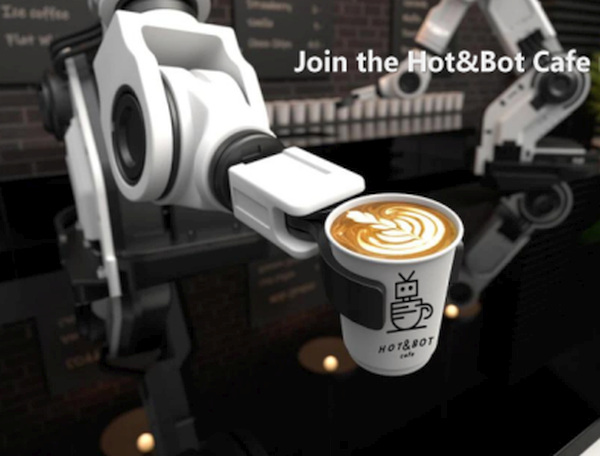

# 